In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\aasho\Desktop\Education\Acedemics Docs\Kaggle Work\Shop Customer Data\Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.rename(columns={'Annual Income ($)': 'Annual_Income_$', 'Spending Score (1-100)': 'Spending_Score_1-100'}, inplace=True)

In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            2000 non-null   int64 
 1   Gender                2000 non-null   object
 2   Age                   2000 non-null   int64 
 3   Annual_Income_$       2000 non-null   int64 
 4   Spending_Score_1-100  2000 non-null   int64 
 5   Profession            1965 non-null   object
 6   Work Experience       2000 non-null   int64 
 7   Family Size           2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income_$'}>],
       [<AxesSubplot:title={'center':'Spending_Score_1-100'}>,
        <AxesSubplot:title={'center':'Work Experience'}>],
       [<AxesSubplot:title={'center':'Family Size'}>, <AxesSubplot:>]],
      dtype=object)

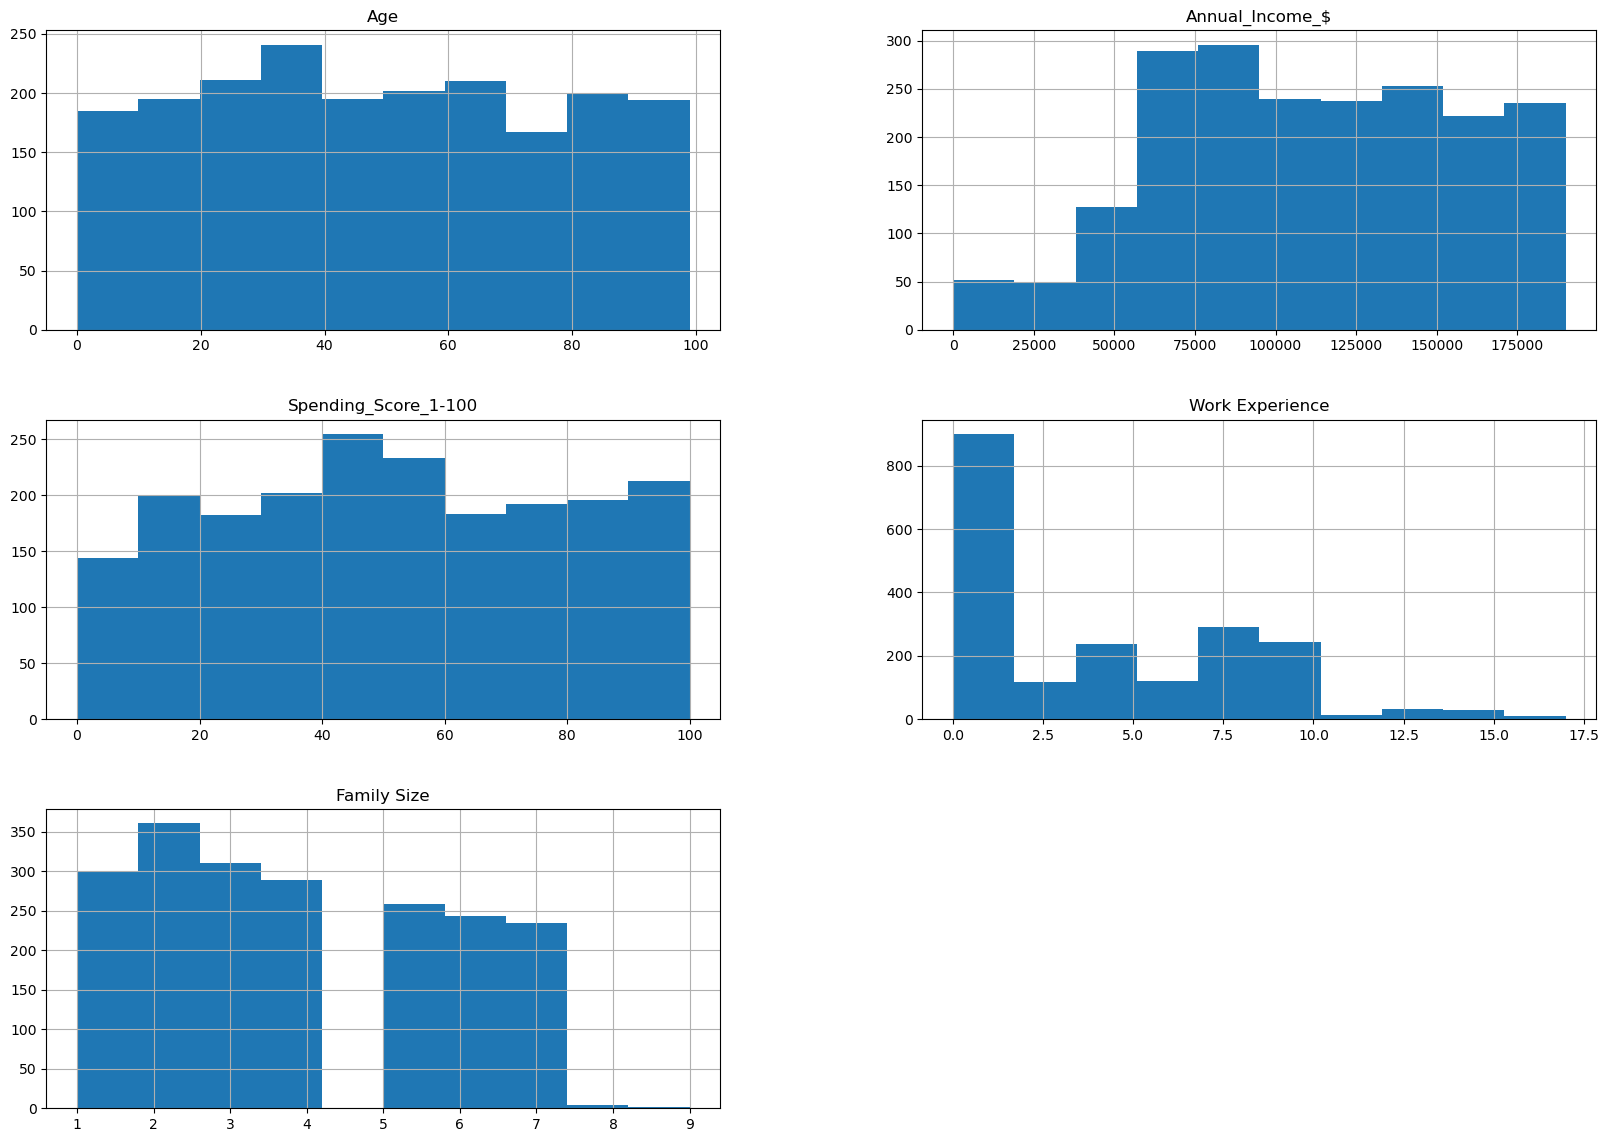

In [7]:
df.iloc[:,df.columns!= 'CustomerID'].hist(figsize=(20,14))

C:\Users\aasho\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

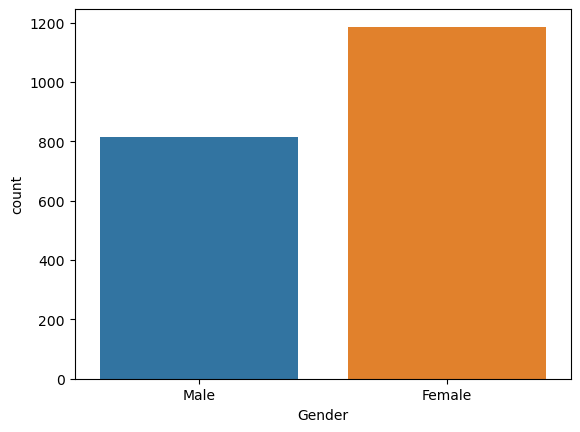

In [8]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Profession', ylabel='Count'>

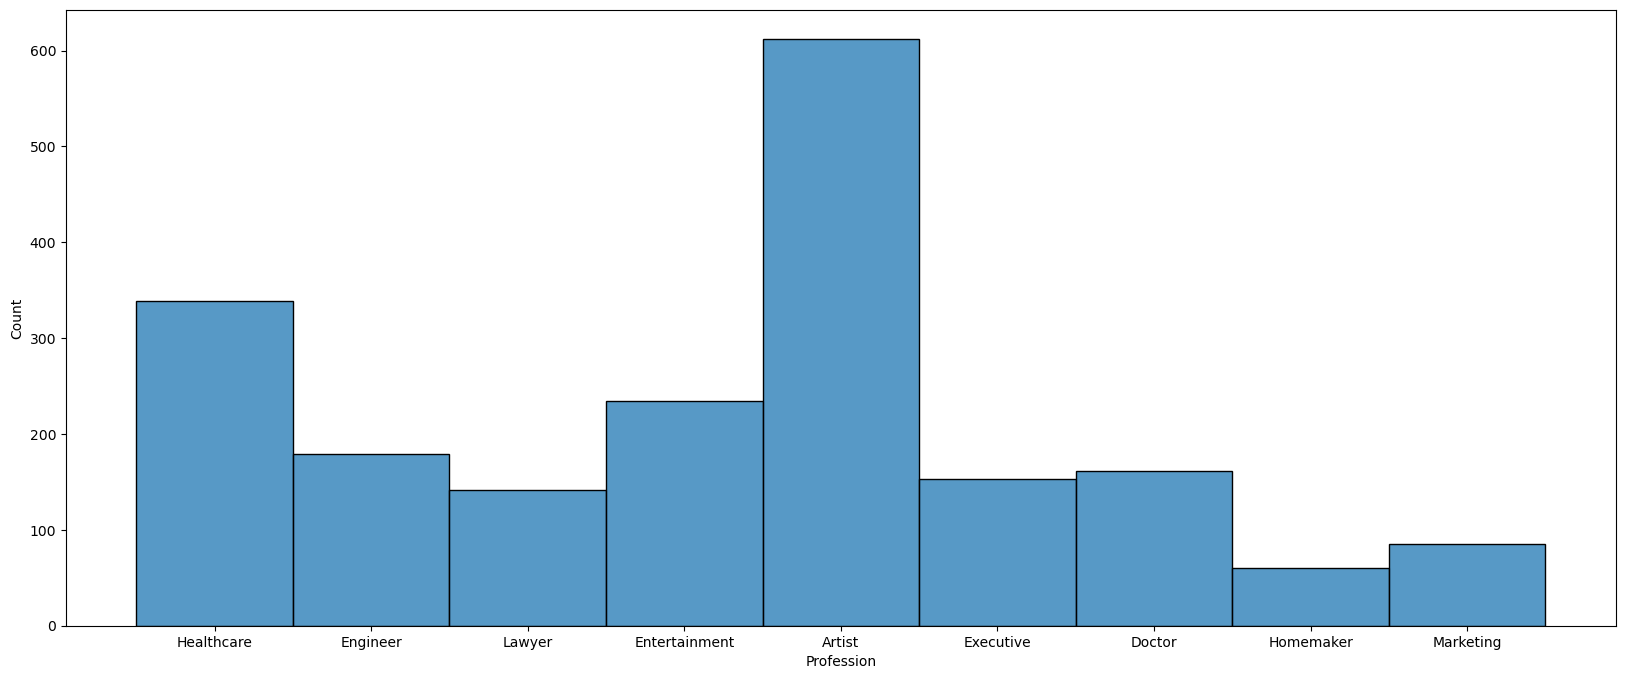

In [9]:
plt.figure(figsize=(20,8))
sns.histplot(x='Profession', data=df,binrange=None)

In [10]:
df_profession = pd.crosstab(df['Profession'],df['Gender'])
df_profession

Gender,Female,Male
Profession,,
Artist,380,232
Doctor,89,72
Engineer,103,76
Entertainment,133,101
Executive,87,66
Healthcare,196,143
Homemaker,39,21
Lawyer,86,56
Marketing,53,32


<AxesSubplot:xlabel='Profession'>

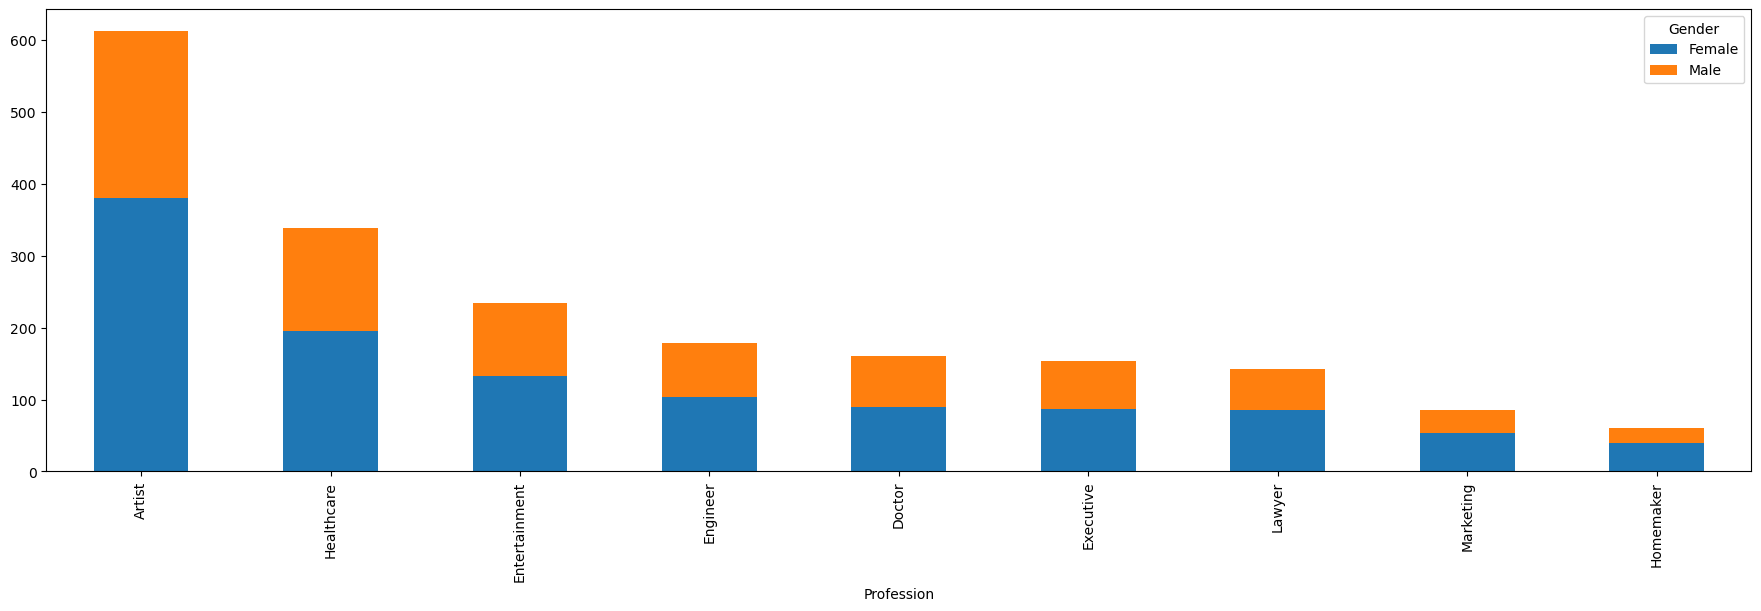

In [11]:
sorted_indices = (df_profession["Female"] + df_profession["Male"]).sort_values(ascending=False).index
sorted_indices
ax=df_profession.loc[sorted_indices, :].plot(kind="bar",stacked=True, figsize=(22,6))
ax

# Handling Missing Values

In [12]:
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
Annual_Income_$          0
Spending_Score_1-100     0
Profession              35
Work Experience          0
Family Size              0
dtype: int64

In [13]:
df['Profession'].value_counts() 

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

In [14]:
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

In [15]:
df.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Annual_Income_$         0
Spending_Score_1-100    0
Profession              0
Work Experience         0
Family Size             0
dtype: int64

# Outliers Treatment

<AxesSubplot:xlabel='Spending_Score_1-100'>

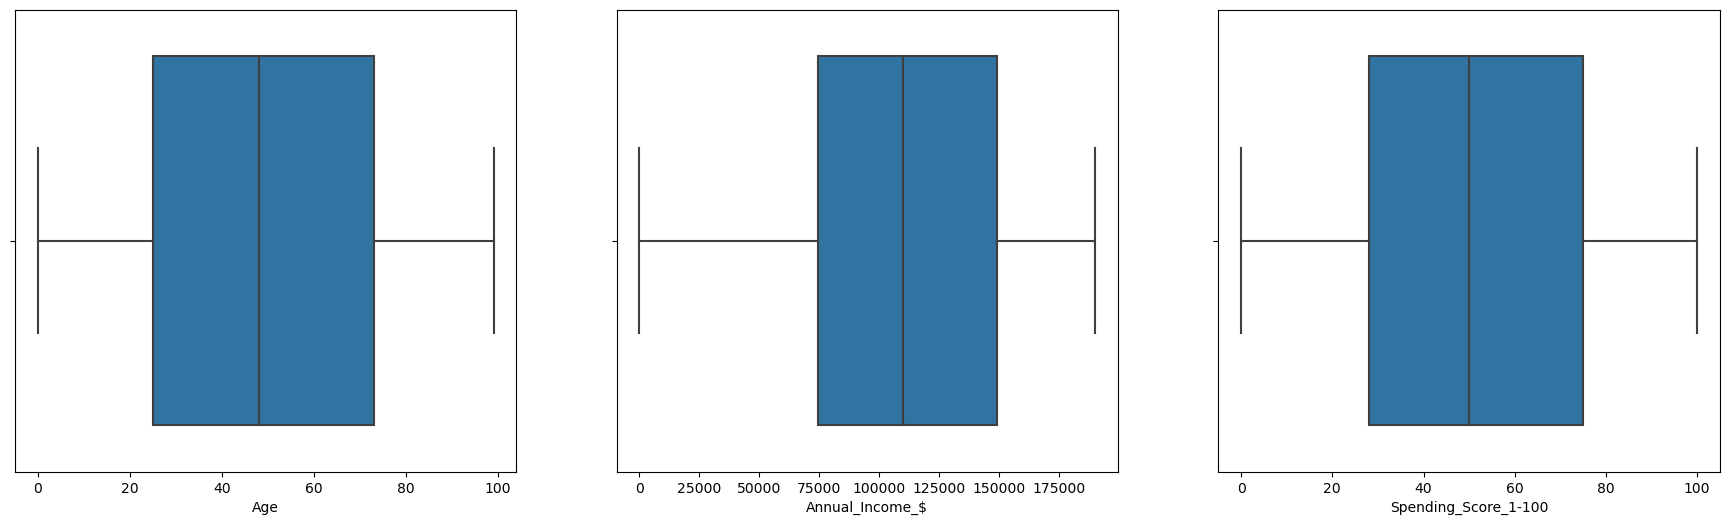

In [16]:
fig, (axa,axai,axss) = plt.subplots(1,3,figsize = (22,6))
sns.boxplot(x=df['Age'], ax= axa)
sns.boxplot(x=df['Annual_Income_$'], ax = axai)
sns.boxplot(x=df['Spending_Score_1-100'], ax = axss)

<AxesSubplot:xlabel='Family Size'>

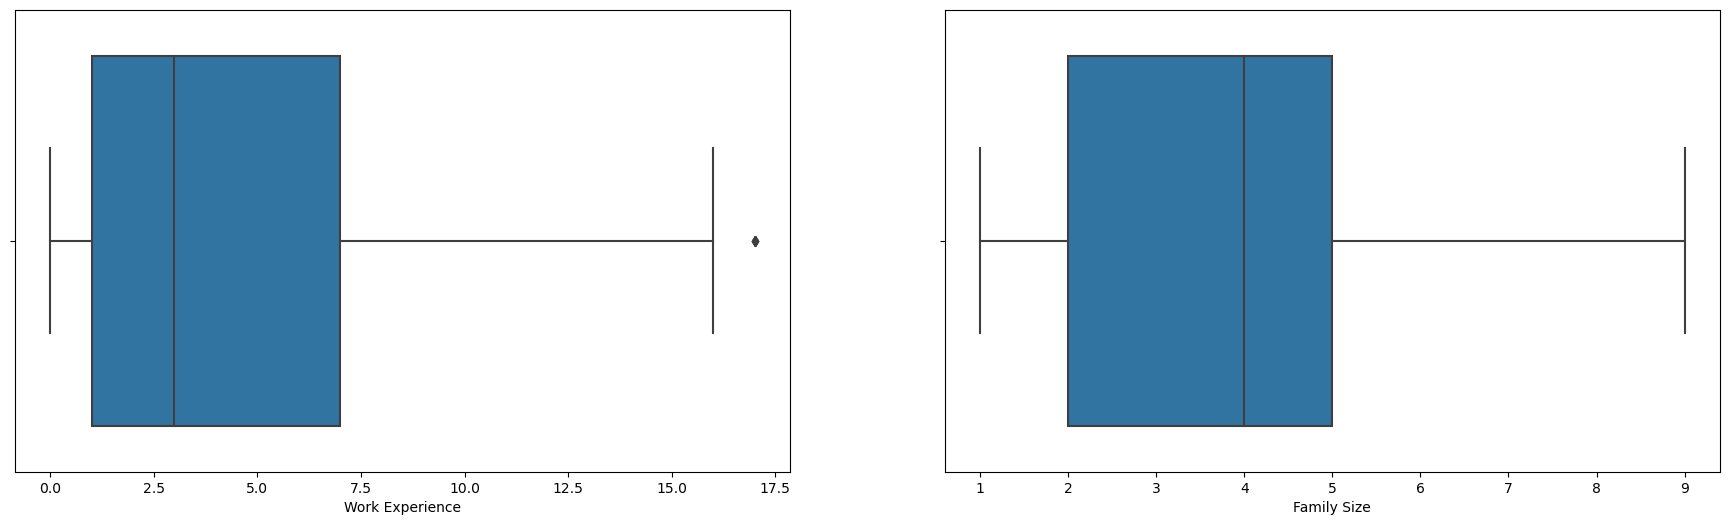

In [17]:
fig, (axwe,axfs) = plt.subplots(1,2,figsize = (22,6))
sns.boxplot(x=df['Work Experience'], ax= axwe)
sns.boxplot(x=df['Family Size'], ax = axfs)

In [18]:
Q1=np.percentile(df['Work Experience'],25)
Q3=np.percentile(df['Work Experience'],75)

In [19]:
IQR = Q3-Q1
upper=Q3+1.5*IQR
lower = Q1 -1.5*IQR

In [20]:
df['Work Experience'].describe()

count    2000.000000
mean        4.102500
std         3.922204
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: Work Experience, dtype: float64

In [21]:
df['Work Experience']=np.where(df['Work Experience']>upper,upper,df['Work Experience'])

C:\Users\aasho\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work Experience'>

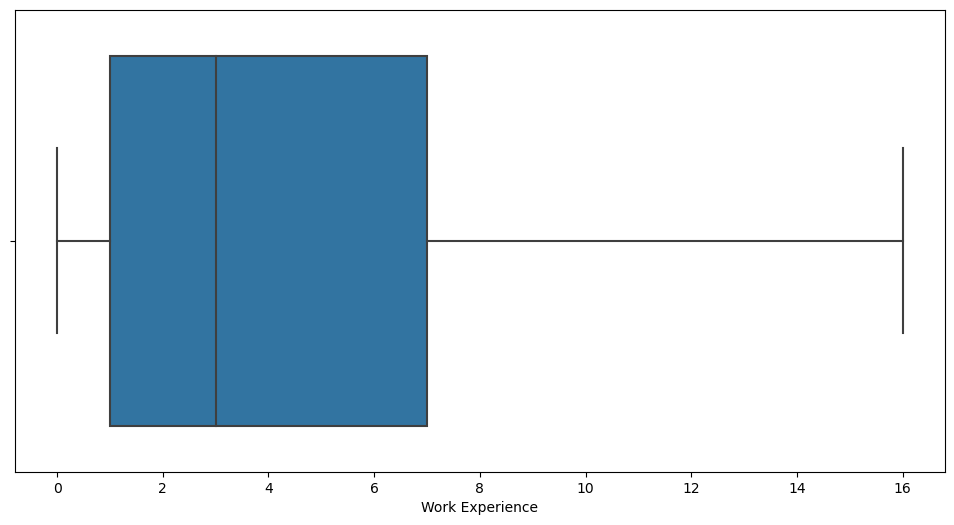

In [22]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(df['Work Experience'])

# Converting Object Data to Numeric

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df.head()

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1.0,4
1,2,Male,21,35000,81,Engineer,3.0,3
2,3,Female,20,86000,6,Engineer,1.0,1
3,4,Female,23,59000,77,Lawyer,0.0,2
4,5,Female,31,38000,40,Entertainment,2.0,6


In [25]:
categ = ['Gender','Profession']
df[categ] = df[categ].apply(le.fit_transform)

In [26]:
df.head()

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1.0,4
1,2,1,21,35000,81,2,3.0,3
2,3,0,20,86000,6,2,1.0,1
3,4,0,23,59000,77,7,0.0,2
4,5,0,31,38000,40,3,2.0,6


# Feature Selection

In [27]:
categories = df.columns[3:]

In [28]:
categories

Index(['Annual_Income_$', 'Spending_Score_1-100', 'Profession',
       'Work Experience', 'Family Size'],
      dtype='object')

In [29]:
scaled_features = df.copy()

In [30]:
scaled_features

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1.0,4
1,2,1,21,35000,81,2,3.0,3
2,3,0,20,86000,6,2,1.0,1
3,4,0,23,59000,77,7,0.0,2
4,5,0,31,38000,40,3,2.0,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8.0,7
1996,1997,0,91,73158,32,1,7.0,7
1997,1998,1,87,90961,14,5,9.0,2
1998,1999,1,77,182109,4,4,7.0,2


In [31]:
features = scaled_features[categories]

In [32]:
features

,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
0,15000,39,5,1.0,4
1,35000,81,2,3.0,3
2,86000,6,2,1.0,1
3,59000,77,7,0.0,2
4,38000,40,3,2.0,6
...,...,...,...,...,...
1995,184387,40,0,8.0,7
1996,73158,32,1,7.0,7
1997,90961,14,5,9.0,2
1998,182109,4,4,7.0,2


In [33]:
features.describe()

,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,110731.821500,50.962500,2.781000,4.100000,3.768500
std,45739.536688,27.934661,2.549763,3.914289,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,74572.000000,28.000000,0.000000,1.000000,2.000000
50%,110045.000000,50.000000,3.000000,3.000000,4.000000
75%,149092.750000,75.000000,5.000000,7.000000,5.000000
max,189974.000000,100.000000,8.000000,16.000000,9.000000


# Data Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features.values)

In [35]:
features

array([[-2.09350095, -0.42833854,  0.87049473, -0.79216814,  0.11749744],
       [-1.65613312,  1.07554599, -0.30637962, -0.28109192, -0.39005088],
       [-0.54084515, -1.6099621 , -0.30637962, -0.79216814, -1.40514752],
       ...,
       [-0.43235606, -1.3235079 ,  0.87049473,  1.25213674, -0.8975992 ],
       [ 1.56090408, -1.68157565,  0.47820328,  0.74106052, -0.8975992 ],
       [-0.00266404,  0.03714953,  0.08591183,  0.2299843 , -0.8975992 ]])

In [36]:
scaled_features[categories]= features

In [37]:
scaled_features

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
0,1,1,19,-2.093501,-0.428339,0.870495,-0.792168,0.117497
1,2,1,21,-1.656133,1.075546,-0.306380,-0.281092,-0.390051
2,3,0,20,-0.540845,-1.609962,-0.306380,-0.792168,-1.405148
3,4,0,23,-1.131292,0.932319,1.655078,-1.047706,-0.897599
4,5,0,31,-1.590528,-0.392532,0.085912,-0.536630,1.132594
...,...,...,...,...,...,...,...,...
1995,1996,0,71,1.610720,-0.392532,-1.090963,0.996599,1.640142
1996,1997,0,91,-0.821679,-0.678986,-0.698671,0.741061,1.640142
1997,1998,1,87,-0.432356,-1.323508,0.870495,1.252137,-0.897599
1998,1999,1,77,1.560904,-1.681576,0.478203,0.741061,-0.897599


# Model Building

In [38]:
# Build K Means Clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [39]:
model = kmeans.fit(scaled_features)

In [40]:
model

KMeans(n_clusters=5, random_state=0)

# Elbow Method

In [41]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

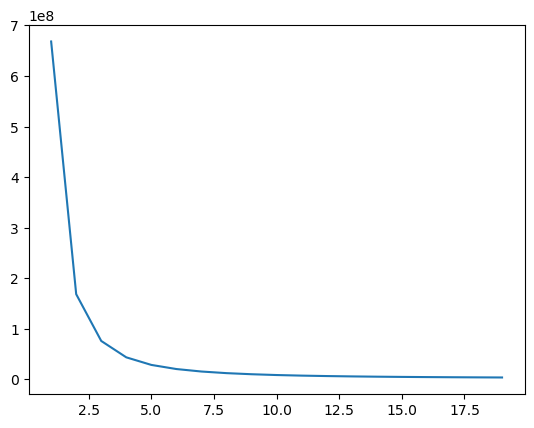

In [42]:
plt.plot(range(1,20), inertia)

# Model Comparison

In [43]:
# Build K Means Clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)

In [44]:
model = kmeans.fit(scaled_features)

In [45]:
scaled_features['cluster'] = kmeans.labels_

In [46]:
scaled_features

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size,cluster
0,1,1,19,-2.093501,-0.428339,0.870495,-0.792168,0.117497,1
1,2,1,21,-1.656133,1.075546,-0.306380,-0.281092,-0.390051,1
2,3,0,20,-0.540845,-1.609962,-0.306380,-0.792168,-1.405148,1
3,4,0,23,-1.131292,0.932319,1.655078,-1.047706,-0.897599,1
4,5,0,31,-1.590528,-0.392532,0.085912,-0.536630,1.132594,1
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,1.610720,-0.392532,-1.090963,0.996599,1.640142,3
1996,1997,0,91,-0.821679,-0.678986,-0.698671,0.741061,1.640142,3
1997,1998,1,87,-0.432356,-1.323508,0.870495,1.252137,-0.897599,3
1998,1999,1,77,1.560904,-1.681576,0.478203,0.741061,-0.897599,3


In [47]:
scaled_features.cluster.value_counts()

1    504
2    502
0    498
3    496
Name: cluster, dtype: int64

<AxesSubplot:ylabel='Age'>

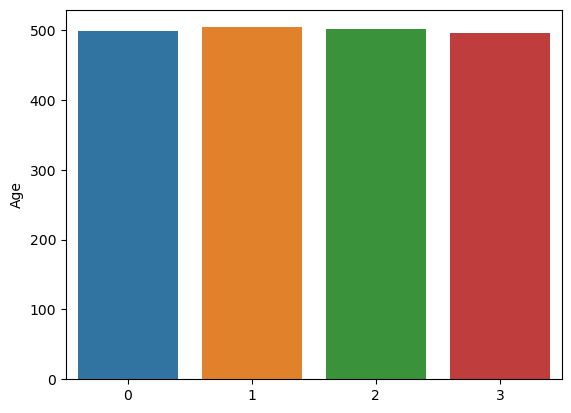

In [48]:
sns.barplot(x=np.arange(0,4,1), y=scaled_features.groupby(['cluster']).count().Age)

In [49]:
size_array=list(scaled_features.groupby(['cluster']).count().Age.values)

In [50]:
size_array

[498, 504, 502, 496]

In [51]:
scaled_features.groupby(['cluster']).mean()[['Annual_Income_$', 'Spending_Score_1-100', 'Profession', 
                                             'Work Experience', 'Family Size']]

,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
cluster,,,,,
0,0.217121,0.040097,-0.077937,-0.072249,0.181705
1,-0.662900,0.006600,-0.016053,-0.002738,-0.349769
2,0.217432,-0.066205,0.046839,-0.061187,0.086155
3,0.235532,0.020040,0.047157,0.137249,0.085776


In [52]:
# Build K Means Clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [53]:
model = kmeans.fit(scaled_features)

In [54]:
scaled_features['cluster'] = kmeans.labels_

In [55]:
scaled_features

,CustomerID,Gender,Age,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size,cluster
0,1,1,19,-2.093501,-0.428339,0.870495,-0.792168,0.117497,1
1,2,1,21,-1.656133,1.075546,-0.306380,-0.281092,-0.390051,1
2,3,0,20,-0.540845,-1.609962,-0.306380,-0.792168,-1.405148,1
3,4,0,23,-1.131292,0.932319,1.655078,-1.047706,-0.897599,1
4,5,0,31,-1.590528,-0.392532,0.085912,-0.536630,1.132594,1
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,1.610720,-0.392532,-1.090963,0.996599,1.640142,0
1996,1997,0,91,-0.821679,-0.678986,-0.698671,0.741061,1.640142,0
1997,1998,1,87,-0.432356,-1.323508,0.870495,1.252137,-0.897599,0
1998,1999,1,77,1.560904,-1.681576,0.478203,0.741061,-0.897599,0


In [56]:
scaled_features.cluster.value_counts()

1    669
2    667
0    664
Name: cluster, dtype: int64

<AxesSubplot:ylabel='Age'>

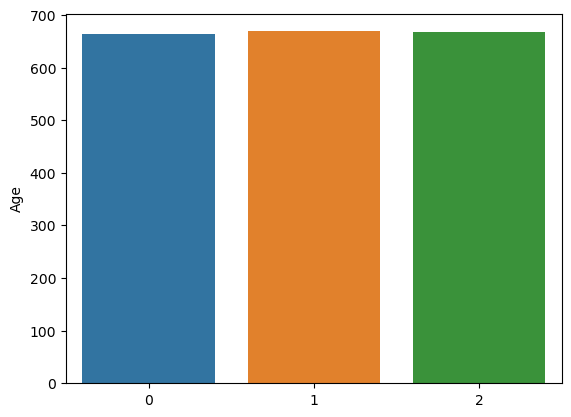

In [57]:
sns.barplot(x=np.arange(0,3,1), y=scaled_features.groupby(['cluster']).count().Age)

In [58]:
size_array=list(scaled_features.groupby(['cluster']).count().Age.values)

In [59]:
size_array

[664, 669, 667]

In [60]:
scaled_features.groupby(['cluster']).mean()[['Annual_Income_$', 'Spending_Score_1-100', 'Profession', 
                                             'Work Experience', 'Family Size']]

,Annual_Income_$,Spending_Score_1-100,Profession,Work Experience,Family Size
cluster,,,,,
0,0.228340,0.041410,0.001427,0.174182,0.107560
1,-0.428545,0.007284,-0.012014,0.013407,-0.226937
2,0.202517,-0.048529,0.010630,-0.186845,0.120541
